## A Sampling of Visualization Tools

Python:  Seaborn and PyGal. Seaborn is a good easy-to-use source for static enhanced matplotlib plots.  PyGal is a library for generating SVGs, which can easily be scalably embedded into web pages.

http://pbpython.com/visualization-tools-1.html

Seaborn by:  http://www.cns.nyu.edu/~mwaskom/ 

PyGal by:  https://github.com/orgs/Kozea/people

For more web-friendly tools, there are those that generate code for you, to prevent you from having to write d3 or other graphics code yourself. These include http://app.rawgraphs.io/ , and the web-based version of plot.ly: https://plot.ly/create/

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import random as rand
import seaborn as sns
import numpy as np
import pandas as pd
import pygal
from IPython.display import SVG, display
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

First, let's generate some data to play with.  A lot of the Python tools assume the data is in Pandas data frames, so let's start there.  Here are a couple of network measures that are inexactly correlated:

In [4]:
d = []
for i in range(100):
    n = rand.randint(5, 20)
    p = rand.uniform(0.01, 0.8)
    G = nx.gnp_random_graph(n, p, seed=None, directed=False)
    density = nx.density(G)
    clustering = nx.average_clustering(G)
    d.append([i, density, clustering])
arr = np.array(d)
df = pd.DataFrame(arr)
df.columns = ["Index", "Density", "Clustering"]
df['Category'] = pd.qcut(df["Density"], 5, labels=False) + 1

In [5]:
df.head()

,Index,Density,Clustering,Category
0,0.0,0.714286,0.730432,5
1,1.0,0.638889,0.743915,4
2,2.0,0.102564,0.000000,1
3,3.0,0.476190,0.690476,3
4,4.0,0.733333,0.822222,5


### Seaborn examples

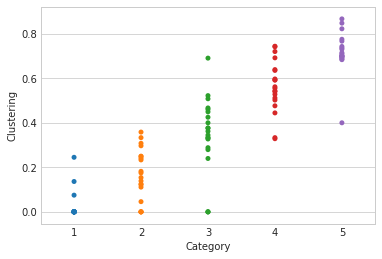

In [8]:
# sns.set_style("whitegrid"
# sns.set_style("darkgrid")
# sns.set_style("white")
# sns.set_style("dark")
# sns.set_style("ticks")
sns.set_style("whitegrid")
sns.stripplot(x="Category", y="Clustering", data=df)

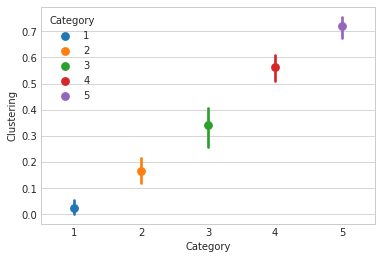

In [9]:
ax = sns.pointplot(x="Category", y="Clustering", hue="Category", data=df)

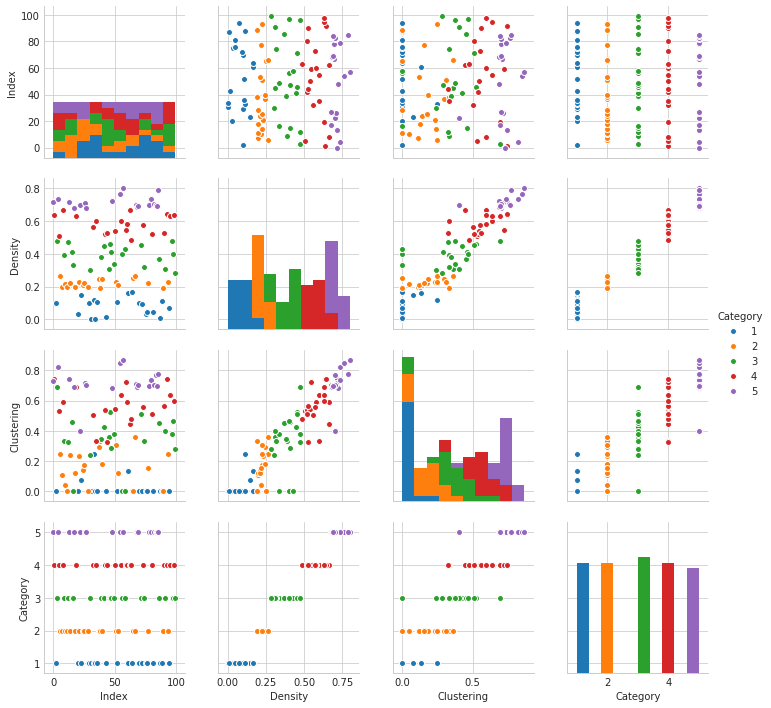

In [10]:
sns.pairplot(data=df, hue="Category")

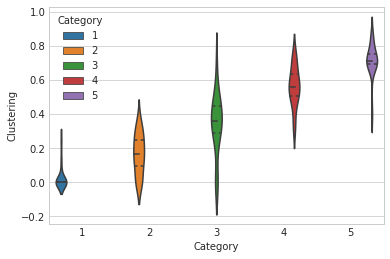

In [11]:
sns.violinplot(x="Category", y="Clustering", hue="Category", data=df, inner="quart")

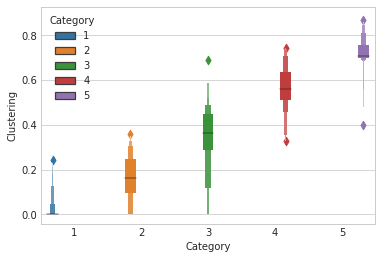

In [12]:
sns.lvplot(x="Category", y="Clustering", hue="Category", data=df, linewidth=2.5)

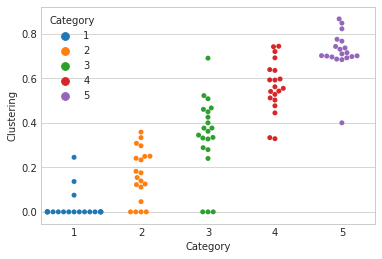

In [13]:
sns.swarmplot(x="Category", y="Clustering", hue="Category", data=df)

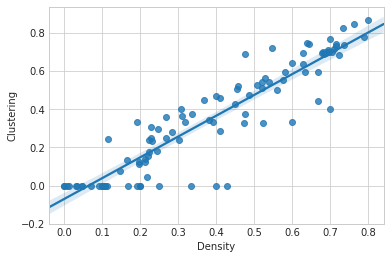

In [14]:
sns.regplot(x="Density", y="Clustering", data=df)

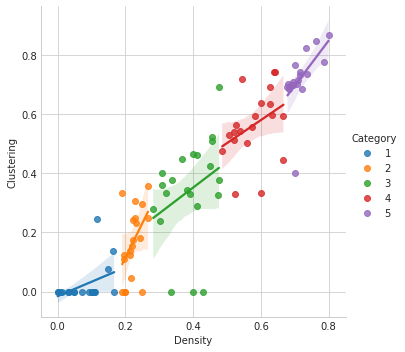

In [17]:
sns.lmplot(x="Density", y="Clustering", hue="Category", truncate=True, size=5, data=df)

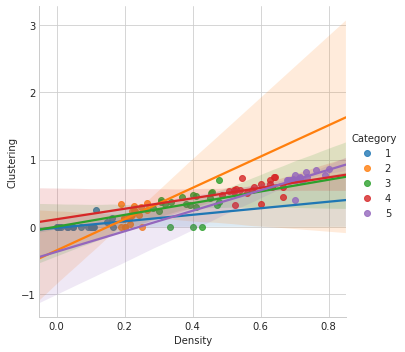

In [18]:
sns.lmplot(x="Density", y="Clustering", hue="Category", size=5, data=df)

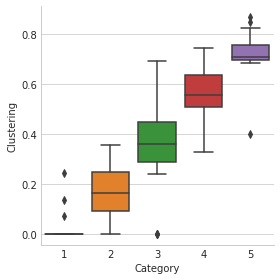

In [19]:
sns.factorplot(x="Category", y="Clustering", data=df, kind="box")

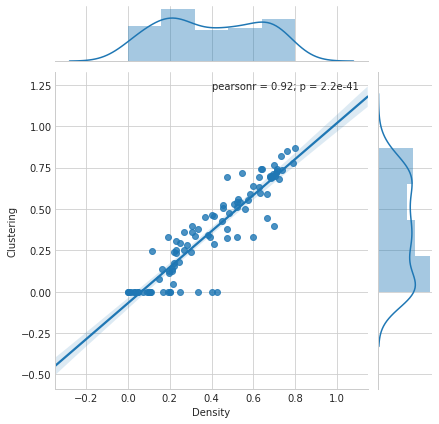

In [20]:
sns.jointplot(x="Density", y="Clustering", data=df, kind="reg")

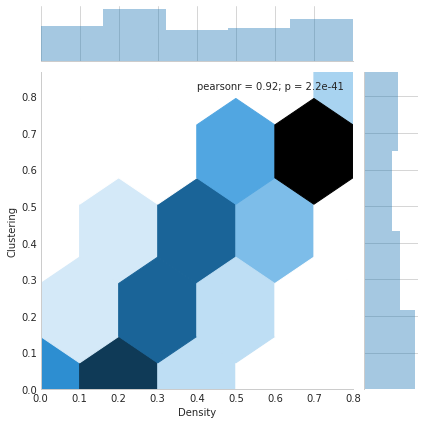

In [21]:
sns.jointplot(x="Density", y="Clustering", data=df, kind="hex")

In [22]:
import cartopy.crs
import cartopy.feature

# From https://gist.github.com/shoyer/16db9cd187886a3effd8
dfx = pd.read_table('https://gist.githubusercontent.com/shoyer/9698df62662ca7243180/raw/'
                   'c9d45b7c9acb3a47341cc8510415887f1b8f5e28/urbanareas1_1.tsv')
dfx = pd.melt(dfx, id_vars=['City', 'City_Alternate', 'Country', 'Latitude', 'Longitude', 'Country_ISO3'],
             value_name='Population')
dfx['Year'] = dfx['variable'].str.slice(3, 7).astype(int)
dfx['PopulationCategory'] = pd.cut(dfx['Population'], [0, 1000, 2000, 3000, 5000, 100000], right=False)
dfx.head()

,City,City_Alternate,Country,Latitude,Longitude,Country_ISO3,variable,Population,Year,PopulationCategory
0,Sofia,NaN,Bulgaria,42.70,23.33,BGR,pop1950,520.0,1950,"[0, 1000)"
1,Mandalay,NaN,Myanmar,21.97,96.08,MMR,pop1950,170.0,1950,"[0, 1000)"
2,Nay Pyi Taw,NaN,Myanmar,19.75,96.10,MMR,pop1950,0.0,1950,"[0, 1000)"
3,Yangon,Rangoon,Myanmar,16.87,96.12,MMR,pop1950,1300.0,1950,"[1000, 2000)"
4,Minsk,NaN,Belarus,53.89,27.57,BLR,pop1950,280.0,1950,"[0, 1000)"


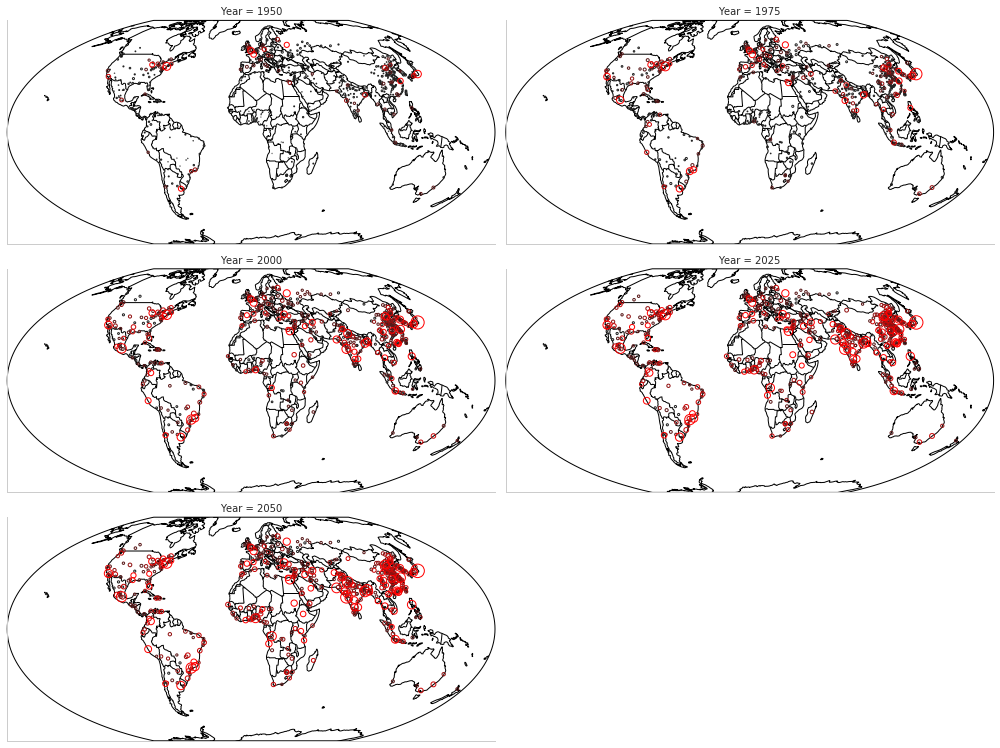

In [24]:
def scatterplot(x, y, s, color=None, **kwargs):
    # the default plt.scatter handles size scaling poorly, so we define our own
    # see also: https://github.com/mwaskom/seaborn/issues/315
    scaled_size = 0.005 * s
    plt.scatter(x, y, s=scaled_size, edgecolor=color, facecolor='none', linewidth=1, **kwargs)

g = sns.FacetGrid(dfx[dfx['Year'] % 25 == 0], col="Year", hue='PopulationCategory',
                  col_wrap=2, size=3.5, aspect=2, palette=sns.dark_palette('Red', 5),
                  subplot_kws=dict(projection=cartopy.crs.Mollweide()))
g.map(scatterplot, "Longitude", "Latitude", "Population",
      transform=cartopy.crs.PlateCarree(), zorder=10)
for ax in g.axes.ravel():
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.set_global()

### PyGal examples

In [27]:
box_plot = pygal.Box(width=1000, height=600)
box_plot.title = 'V8 benchmark results'
box_plot.add('Chrome', [6395, 8212, 7520, 7218, 12464, 1660, 2123, 8607])
box_plot.add('Firefox', [7473, 8099, 11700, 2651, 6361, 1044, 3797, 9450])
box_plot.add('Opera', [3472, 2933, 4203, 5229, 5810, 1828, 9013, 4669])
box_plot.add('IE', [43, 41, 59, 79, 144, 136, 34, 102])
svg = box_plot.render().decode("utf-8")

display(HTML("<svg style='width: 1000px; height: 600px'>" + svg + "</svg>"))
    

In [29]:
from collections import defaultdict

xy_chart = pygal.XY(stroke=False)
xy_chart.title = 'Graph Density versus Clustering'

d = defaultdict(list)
for index, row in df.iterrows():
    d[row["Category"]].append((row["Density"], row["Clustering"]))

for k in d:
    xy_chart.add(str(int(k)), d[k])
xy_chart.value_formatter = lambda x:  '%s%%' % x
svg = xy_chart.render().decode("utf-8")

display(HTML("<svg style='width: 1000px; height: 600px'>" + svg + "</svg>"))

In [30]:
ages = [(364381, 358443, 360172, 345848, 334895, 326914, 323053, 312576, 302015, 301277, 309874, 318295, 323396, 332736, 330759, 335267, 345096, 352685, 368067, 381521, 380145, 378724, 388045, 382303, 373469, 365184, 342869, 316928, 285137, 273553, 250861, 221358, 195884, 179321, 171010, 162594, 152221, 148843, 143013, 135887, 125824, 121493, 115913, 113738, 105612, 99596, 91609, 83917, 75688, 69538, 62999, 58864, 54593, 48818, 44739, 41096, 39169, 36321, 34284, 32330, 31437, 30661, 31332, 30334, 23600, 21999, 20187, 19075, 16574, 15091, 14977, 14171, 13687, 13155, 12558, 11600, 10827, 10436, 9851, 9794, 8787, 7993, 6901, 6422, 5506, 4839, 4144, 3433, 2936, 2615),
   (346205, 340570, 342668, 328475, 319010, 312898, 308153, 296752, 289639, 290466, 296190, 303871, 309886, 317436, 315487, 316696, 325772, 331694, 345815, 354696, 354899, 351727, 354579, 341702, 336421, 321116, 292261, 261874, 242407, 229488, 208939, 184147, 162662, 147361, 140424, 134336, 126929, 125404, 122764, 116004, 105590, 100813, 95021, 90950, 85036, 79391, 72952, 66022, 59326, 52716, 46582, 42772, 38509, 34048, 30887, 28053, 26152, 23931, 22039, 20677, 19869, 19026, 18757, 18308, 14458, 13685, 12942, 12323, 11033, 10183, 10628, 10803, 10655, 10482, 10202, 10166, 9939, 10138, 10007, 10174, 9997, 9465, 9028, 8806, 8450, 7941, 7253, 6698, 6267, 5773),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 91, 412, 1319, 2984, 5816, 10053, 16045, 24240, 35066, 47828, 62384, 78916, 97822, 112738, 124414, 130658, 140789, 153951, 168560, 179996, 194471, 212006, 225209, 228886, 239690, 245974, 253459, 255455, 260715, 259980, 256481, 252222, 249467, 240268, 238465, 238167, 231361, 223832, 220459, 222512, 220099, 219301, 221322, 229783, 239336, 258360, 271151, 218063, 213461, 207617, 196227, 174615, 160855, 165410, 163070, 157379, 149698, 140570, 131785, 119936, 113751, 106989, 99294, 89097, 78413, 68174, 60592, 52189, 43375, 35469, 29648, 24575, 20863),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 74, 392, 1351, 3906, 7847, 12857, 19913, 29108, 42475, 58287, 74163, 90724, 108375, 125886, 141559, 148061, 152871, 159725, 171298, 183536, 196136, 210831, 228757, 238731, 239616, 250036, 251759, 259593, 261832, 264864, 264702, 264070, 258117, 253678, 245440, 241342, 239843, 232493, 226118, 221644, 223440, 219833, 219659, 221271, 227123, 232865, 250646, 261796, 210136, 201824, 193109, 181831, 159280, 145235, 145929, 140266, 133082, 124350, 114441, 104655, 93223, 85899, 78800, 72081, 62645, 53214, 44086, 38481, 32219, 26867, 21443, 16899, 13680, 11508),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 5, 17, 15, 31, 34, 38, 35, 45, 299, 295, 218, 247, 252, 254, 222, 307, 316, 385, 416, 463, 557, 670, 830, 889, 1025, 1149, 1356, 1488, 1835, 1929, 2130, 2362, 2494, 2884, 3160, 3487, 3916, 4196, 4619, 5032, 5709, 6347, 7288, 8139, 9344, 11002, 12809, 11504, 11918, 12927, 13642, 13298, 14015, 15751, 17445, 18591, 19682, 20969, 21629, 22549, 23619, 25288, 26293, 27038, 27039, 27070, 27750, 27244, 25905, 24357, 22561, 21794, 20595),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 0, 8, 21, 34, 49, 84, 97, 368, 401, 414, 557, 654, 631, 689, 698, 858, 1031, 1120, 1263, 1614, 1882, 2137, 2516, 2923, 3132, 3741, 4259, 4930, 5320, 5948, 6548, 7463, 8309, 9142, 10321, 11167, 12062, 13317, 15238, 16706, 18236, 20336, 23407, 27024, 32502, 37334, 34454, 38080, 41811, 44490, 45247, 46830, 53616, 58798, 63224, 66841, 71086, 73654, 77334, 82062, 87314, 92207, 94603, 94113, 92753, 93174, 91812, 87757, 84255, 79723, 77536, 74173),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 11, 35, 137, 331, 803, 1580, 2361, 3632, 4866, 6849, 8754, 10422, 12316, 14152, 16911, 19788, 22822, 27329, 31547, 35711, 38932, 42956, 46466, 49983, 52885, 55178, 56549, 57632, 57770, 57427, 56348, 55593, 55554, 53266, 51084, 49342, 48555, 47067, 45789, 44988, 44624, 44238, 46267, 46203, 36964, 33866, 31701, 28770, 25174, 22702, 21934, 20638, 19051, 17073, 15381, 13736, 11690, 10368, 9350, 8375, 7063, 6006, 5044, 4030, 3420, 2612, 2006, 1709, 1264, 1018),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 6, 11, 20, 68, 179, 480, 1077, 2094, 3581, 5151, 7047, 9590, 12434, 15039, 17257, 19098, 21324, 24453, 27813, 32316, 37281, 43597, 49647, 53559, 58888, 62375, 67219, 70956, 73547, 74904, 75994, 76224, 74979, 72064, 70330, 68944, 66527, 63073, 60899, 60968, 58756, 57647, 56301, 57246, 57068, 59027, 59187, 47549, 44425, 40976, 38077, 32904, 29431, 29491, 28020, 26086, 24069, 21742, 19498, 17400, 15738, 14451, 13107, 11568, 10171, 8530, 7273, 6488, 5372, 4499, 3691, 3259, 2657)]

types = ['Males single', 'Females single',
         'Males married', 'Females married',
         'Males widowed', 'Females widowed',
         'Males divorced', 'Females divorced']

pyramid_chart = pygal.Pyramid(legend_at_bottom=True)
pyramid_chart.title = 'England population by age in 2010 (source: ons.gov.uk)'
pyramid_chart.x_labels = map(lambda x: str(x) if not x % 5 else '', range(90))
for type, age in zip(types, ages):
    pyramid_chart.add(type, age)
svg = pyramid_chart.render().decode("utf-8")
display(HTML("<svg style='width: 1000px; height: 600px'>" + svg + "</svg>"))

In [32]:
import pygal.maps.world
supra = pygal.maps.world.SupranationalWorld()
supra.add('Asia', [('asia', 1)])
supra.add('Europe', [('europe', 1)])
supra.add('Africa', [('africa', 1)])
supra.add('North america', [('north_america', 1)])
supra.add('South america', [('south_america', 1)])
supra.add('Oceania', [('oceania', 1)])
supra.add('Antartica', [('antartica', 1)])
svg = supra.render().decode("utf-8")
display(HTML("<svg style='width: 1000px; height: 600px'>" + svg + "</svg>"))

In [33]:
treemap = pygal.Treemap()
treemap.title = 'Binary TreeMap'
treemap.add('A', [2, 1, 12, 4, 2, 1, 1, 3, 12, 3, 4, None, 9])
treemap.add('B', [4, 2, 5, 10, 3, 4, 2, 7, 4, -10, None, 8, 3, 1])
treemap.add('C', [3, 8, 3, 3, 5, 3, 3, 5, 4, 12])
treemap.add('D', [23, 18])
treemap.add('E', [1, 2, 1, 2, 3, 3, 1, 2, 3,
      4, 3, 1, 2, 1, 1, 1, 1, 1])
treemap.add('F', [31])
treemap.add('G', [5, 9.3, 8.1, 12, 4, 3, 2])
treemap.add('H', [12, 3, 3])
treemap.render()
svg = treemap.render().decode("utf-8")
display(HTML("<svg style='width: 1000px; height: 600px'>" + svg + "</svg>"))

### Sample d3 generators: http://app.rawgraphs.io/ 

In [ ]:
# Here's our original data for copying and pasting into rawgraphs.io:

"""
id	Index	Density	Clustering	Category
0	0.0	0.48484848484848486	0.5009920634920636	4
1	1.0	0.6	0.8	4
2	2.0	0.6666666666666666	0.6666666666666666	5
3	3.0	0.09090909090909091	0.0	1
4	4.0	0.5333333333333333	0.6055555555555555	4
5	5.0	0.7132352941176471	0.7054536966301673	5
6	6.0	0.08947368421052632	0.0	1
7	7.0	0.3888888888888889	0.3407407407407408	3
8	8.0	0.5272727272727272	0.44199134199134205	4
9	9.0	0.6	0.61991341991342	4
10	10.0	0.045454545454545456	0.0	1
11	11.0	0.06666666666666667	0.0	1
12	12.0	0.17857142857142858	0.0	2
13	13.0	0.6013071895424836	0.5783044116377449	5
14	14.0	0.8021978021978022	0.8211685140256569	5
15	15.0	0.28888888888888886	0.45	3
16	16.0	0.07575757575757576	0.0	1
17	17.0	0.6923076923076923	0.7257520257520258	5
18	18.0	0.21212121212121213	0.0	2
19	19.0	0.06666666666666667	0.0	1
20	20.0	0.08974358974358974	0.0	1
21	21.0	0.5686274509803921	0.5944851444851444	4
22	22.0	0.6	0.6303174603174603	4
23	23.0	0.17142857142857143	0.1111111111111111	2
24	24.0	0.3235294117647059	0.4913165266106443	3
25	25.0	0.2222222222222222	0.12155388471177944	2
26	26.0	0.07142857142857142	0.0	1
27	27.0	0.7	0.7	5
28	28.0	0.6111111111111112	0.655026455026455	5
29	29.0	0.6176470588235294	0.5956540191834309	5
30	30.0	0.7307692307692307	0.7016483516483517	5
31	31.0	0.7352941176470589	0.7383296442119971	5
32	32.0	0.3333333333333333	0.27777777777777773	3
33	33.0	0.2	0.0	2
34	34.0	0.09523809523809523	0.0	1
35	35.0	0.6071428571428571	0.5083333333333334	5
36	36.0	0.4090909090909091	0.3746031746031746	4
37	37.0	0.48366013071895425	0.4623416706750041	4
38	38.0	0.05454545454545454	0.0	1
39	39.0	0.42857142857142855	0.4877551020408163	4
40	40.0	0.2222222222222222	0.38333333333333336	2
41	41.0	0.3055555555555556	0.15925925925925927	3
42	42.0	0.008333333333333333	0.0	1
43	43.0	0.5	0.0	4
44	44.0	0.22727272727272727	0.1111111111111111	3
45	45.0	0.25757575757575757	0.32499999999999996	3
46	46.0	0.0	0.0	1
47	47.0	0.5294117647058824	0.5293438587556234	4
48	48.0	0.17777777777777778	0.0	2
49	49.0	0.22727272727272727	0.3055555555555555	3
50	50.0	0.041666666666666664	0.0	1
51	51.0	0.26666666666666666	0.0	3
52	52.0	0.8666666666666667	0.8222222222222221	5
53	53.0	0.2087912087912088	0.08571428571428572	2
54	54.0	0.0661764705882353	0.0	1
55	55.0	0.026143790849673203	0.0	1
56	56.0	0.5454545454545454	0.4943722943722944	4
57	57.0	0.09473684210526316	0.06666666666666667	1
58	58.0	0.19047619047619047	0.0	2
59	59.0	0.26666666666666666	0.0	3
60	60.0	0.3	0.0	3
61	61.0	0.10256410256410256	0.1794871794871795	2
62	62.0	0.03636363636363636	0.0	1
63	63.0	0.47619047619047616	0.5476190476190476	4
64	64.0	0.8571428571428571	0.8333333333333334	5
65	65.0	0.45263157894736844	0.4429653679653679	4
66	66.0	0.11764705882352941	0.09259259259259259	2
67	67.0	0.5555555555555556	0.4703703703703704	4
68	68.0	0.13333333333333333	0.0	2
69	69.0	0.1830065359477124	0.15185185185185185	2
70	70.0	0.8095238095238095	0.8666666666666666	5
71	71.0	0.14102564102564102	0.0	2
72	72.0	0.6923076923076923	0.7132811632811633	5
73	73.0	0.783625730994152	0.792271505584199	5
74	74.0	0.6	0.6	4
75	75.0	0.5714285714285714	0.5012169312169312	4
76	76.0	0.2647058823529412	0.11120448179271707	3
77	77.0	0.3333333333333333	0.38888888888888884	3
78	78.0	0.23809523809523808	0.0	3
79	79.0	0.1	0.0	2
80	80.0	0.8571428571428571	0.8410714285714285	5
81	81.0	0.40522875816993464	0.486648228314895	3
82	82.0	0.0	0.0	1
83	83.0	0.14285714285714285	0.0	2
84	84.0	0.0	0.0	1
85	85.0	0.32967032967032966	0.3988095238095238	3
86	86.0	0.6	0.7942857142857143	4
87	87.0	0.4666666666666667	0.5728571428571428	4
88	88.0	0.4093567251461988	0.389515455304929	4
89	89.0	0.03571428571428571	0.0	1
90	90.0	0.38333333333333336	0.47951388888888885	3
91	91.0	0.2	0.0	2
92	92.0	0.8083333333333333	0.7967518592518593	5
93	93.0	0.21637426900584794	0.2754385964912281	2
94	94.0	0.31666666666666665	0.3661706349206349	3
95	95.0	0.2	0.0	2
96	96.0	0.14285714285714285	0.10476190476190475	2
97	97.0	0.29411764705882354	0.3343915343915344	3
98	98.0	0.1111111111111111	0.0	2
99	99.0	0.46405228758169936	0.45858585858585854	4
"""

From there, we can generate a png file and drop it into a document or web page:

In [34]:
display(HTML("<img src='sample_rawgraphs_output.png'/>"))

Similarly, we can drop out data in to https://plot.ly/create/ and generate and download a file for display or putting in a paper/on a web page, etc.

In [35]:
display(HTML("<img src='sample_plotly_output.png'/>"))

For more web-based tools, let's switch over to a web environment by starting up web server at the command line (for Python 3), and opening up a text file in the same directory:

python -m http.server